# Eager Execution in Tensorflow 2.0

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

## Tensor Operations

In [2]:
tf.add(1, 2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [3]:
tf.add([1, 2], [3, 4])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [4]:
tf.square(5)

<tf.Tensor: shape=(), dtype=int32, numpy=25>

In [5]:
tf.reduce_sum([1, 2, 3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [6]:
tf.square(2) + tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=13>

In [7]:
x = tf.matmul([[1]], [[2, 3]])

In [8]:
x.shape

TensorShape([1, 2])

In [9]:
x.dtype

tf.int32

In [10]:
x.numpy()

array([[2, 3]], dtype=int32)

## Custom Layers

In [11]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", 
                                      shape=[int(input_shape[-1]), 
                                             self.num_outputs],
                                      initializer='normal')
    
        self.bias = self.add_weight("bias", 
                                    shape=[self.num_outputs,],
                                    initializer='normal')

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel) + self.bias

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation

In [13]:
model = Sequential([
    MyDenseLayer(20),
    Activation('relu'),
    MyDenseLayer(3),
])

In [14]:
model.build(input_shape=(None, 4))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_dense_layer (MyDenseLayer multiple                  100       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
my_dense_layer_1 (MyDenseLay multiple                  63        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [16]:
X = tf.random.normal([7, 4])

In [17]:
X

<tf.Tensor: shape=(7, 4), dtype=float32, numpy=
array([[ 1.4755569 ,  0.8581777 ,  0.9022813 , -1.2902218 ],
       [-0.17976514, -0.22564135, -0.03036232, -0.20002328],
       [ 0.38670635,  0.77733386,  0.5311429 ,  0.99650276],
       [ 0.2025152 , -0.21345237, -3.4515634 , -0.527624  ],
       [ 1.5440575 , -0.58645546, -0.05673727, -1.1408058 ],
       [ 1.7882582 ,  0.24992827,  0.14442182,  0.84280175],
       [-0.7982104 , -1.5754186 , -0.46758175,  0.71215886]],
      dtype=float32)>

### Model works like a function:

In [18]:
model(X)

<tf.Tensor: shape=(7, 3), dtype=float32, numpy=
array([[ 0.02196088, -0.01613528,  0.09573311],
       [-0.00142481, -0.00861402,  0.08110239],
       [ 0.00472419, -0.0253799 ,  0.09441759],
       [ 0.0426681 , -0.01509169,  0.03267537],
       [ 0.01572378, -0.0117061 ,  0.07914659],
       [ 0.03569429, -0.02367161,  0.08860902],
       [ 0.00913916, -0.0258826 ,  0.0579475 ]], dtype=float32)>

In [19]:
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype('float32')
y = df['species'].map({"setosa": 0, "versicolor": 1, "virginica": 2}).values.astype('int32')

### Datasets

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.shuffle(1000).repeat().batch(16)

## One batch:

In [22]:
dataset.take(1)
for data, labels in dataset.take(1):
    print(data)
    print(labels)
    print("Logits: ", model(data))

tf.Tensor(
[[5.  2.3 3.3 1. ]
 [5.4 3.4 1.5 0.4]
 [6.6 3.  4.4 1.4]
 [6.3 2.3 4.4 1.3]
 [5.  3.4 1.6 0.4]
 [4.8 3.  1.4 0.1]
 [5.5 2.3 4.  1.3]
 [7.2 3.  5.8 1.6]
 [6.4 2.8 5.6 2.1]
 [6.4 3.2 4.5 1.5]
 [5.8 2.7 5.1 1.9]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 5.4 2.1]
 [5.4 3.4 1.7 0.2]
 [5.1 3.3 1.7 0.5]
 [5.9 3.2 4.8 1.8]], shape=(16, 4), dtype=float32)
tf.Tensor([1 0 1 1 0 0 1 2 2 1 2 2 2 0 0 1], shape=(16,), dtype=int32)
Logits:  tf.Tensor(
[[ 0.10511804 -0.03798645  0.09691212]
 [ 0.11055826 -0.03646594  0.11068645]
 [ 0.13951796 -0.0468803   0.09726395]
 [ 0.13326713 -0.04484738  0.09255449]
 [ 0.10161591 -0.03555451  0.11100347]
 [ 0.0945442  -0.03372842  0.10981344]
 [ 0.11709996 -0.04124082  0.09389034]
 [ 0.1506049  -0.05263031  0.0938684 ]
 [ 0.13951167 -0.04870183  0.09060608]
 [ 0.13558844 -0.04681469  0.09840717]
 [ 0.1260336  -0.04545037  0.09215057]
 [ 0.14178795 -0.04984004  0.09130684]
 [ 0.1503487  -0.05014912  0.09269259]
 [ 0.10787534 -0.03728551  0.11155952]
 [ 0.10473407 -0

## Optimizer and Loss

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [24]:
optimizer = Adam()
loss = SparseCategoricalCrossentropy(from_logits=True)

In [25]:
logits = model(data)
logits

<tf.Tensor: shape=(16, 3), dtype=float32, numpy=
array([[ 0.10511804, -0.03798645,  0.09691212],
       [ 0.11055826, -0.03646594,  0.11068645],
       [ 0.13951796, -0.0468803 ,  0.09726395],
       [ 0.13326713, -0.04484738,  0.09255449],
       [ 0.10161591, -0.03555451,  0.11100347],
       [ 0.0945442 , -0.03372842,  0.10981344],
       [ 0.11709996, -0.04124082,  0.09389034],
       [ 0.1506049 , -0.05263031,  0.0938684 ],
       [ 0.13951167, -0.04870183,  0.09060608],
       [ 0.13558844, -0.04681469,  0.09840717],
       [ 0.1260336 , -0.04545037,  0.09215057],
       [ 0.14178795, -0.04984004,  0.09130684],
       [ 0.1503487 , -0.05014912,  0.09269259],
       [ 0.10787534, -0.03728551,  0.11155952],
       [ 0.10473407, -0.03586448,  0.10942615],
       [ 0.12707517, -0.04585813,  0.09693824]], dtype=float32)>

In [26]:
loss(labels, logits).numpy()

1.1166824

## Gradients

In [27]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        logits = model(inputs, training=True)
        loss_value = loss(targets, logits)
    return tape.gradient(loss_value, model.variables)

grad(model, data, labels)

[<tf.Tensor: shape=(4, 20), dtype=float32, numpy=
 array([[ 0.        ,  0.02645542,  0.        ,  0.01696693,  0.0365556 ,
         -0.10310022,  0.        ,  0.04324415,  0.        ,  0.03262446,
         -0.00923942,  0.        , -0.00959512,  0.03474272,  0.        ,
          0.        ,  0.        ,  0.        ,  0.04403365,  0.0665247 ],
        [ 0.        , -0.00366462,  0.        , -0.00850451, -0.00180222,
         -0.01967513,  0.        ,  0.0213288 ,  0.        ,  0.00732415,
          0.00426789,  0.        , -0.00974136,  0.00037826,  0.        ,
          0.        ,  0.        ,  0.        ,  0.00871117,  0.00596284],
        [ 0.        ,  0.07208437,  0.        ,  0.06183556,  0.07633189,
         -0.14652711,  0.        ,  0.009505  ,  0.        ,  0.03736167,
         -0.03242178,  0.        ,  0.01514039,  0.06534515,  0.        ,
          0.        ,  0.        ,  0.        ,  0.05447158,  0.10708129],
        [ 0.        ,  0.03045571,  0.        ,  0.02667774

In [28]:
gw1, gb1, gw2, gb2  = grad(model, data, labels)

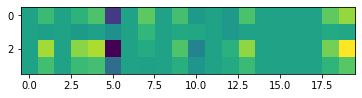

In [29]:
plt.imshow(gw1);

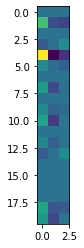

In [30]:
plt.imshow(gw2);

## Training Loop

In [31]:
loss_history = []
accuracy_history = []
acc = tf.keras.metrics.SparseCategoricalAccuracy()

for (i, (data, labels)) in enumerate(dataset.take(400)):
    with tf.GradientTape() as tape:
        logits = model(data, training=True)
        loss_value = loss(labels, logits)

    loss_history.append(loss_value.numpy())
    
    grads = tape.gradient(loss_value, model.trainable_variables)
    
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
    acc.update_state(labels, logits)
    accuracy = acc.result().numpy()
    accuracy_history.append(accuracy)
    
    if i % 20 == 0:
        print(i, loss_value.numpy(), accuracy)

0 1.09389 0.0
20 1.0810051 0.29464287
40 1.0239626 0.30335367
60 1.0205867 0.3637295
80 0.9994831 0.43441358
100 0.9042232 0.48329207
120 0.8278267 0.5139463
140 0.8101361 0.5359042
160 0.7324396 0.55240685
180 0.67716175 0.5642265
200 0.644692 0.5743159
220 0.5130469 0.584276
240 0.59450734 0.59154564
260 0.575645 0.60057473
280 0.5330106 0.6107651
300 0.44914562 0.6241694
320 0.46521777 0.63862926
340 0.47693375 0.65469205
360 0.33456153 0.66949445
380 0.43007395 0.68389106


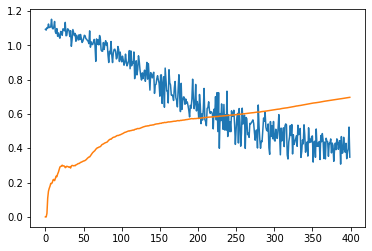

In [32]:
plt.plot(loss_history)
plt.plot(accuracy_history)